<a href="https://colab.research.google.com/github/LoveMeWithoutAll/keraspp/blob/feature%2Fch2_study/study/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers, models

Using TensorFlow backend.


In [0]:
class ANN(models.Model):
  def __init__(self, Nin, Nh, Nout):
    hidden = layers.Dense(Nh)
    output = layers.Dense(Nout)
    relu = layers.Activation('relu')

    x = layers.Input(shape=(Nin,))
    h = relu(hidden(x))
    y = output(h)

    super().__init__(x, y)
    self.compile(loss='mse', optimizer='sgd')

In [0]:
from keras import datasets
from sklearn import preprocessing

def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
  scaler = preprocessing.MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return (X_train, y_train), (X_test, y_test)

In [0]:
import matplotlib.pyplot as plt

def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)

In [0]:
def main():
  Nin = 13
  Nh = 5
  Nout = 1

  model = ANN(Nin=Nin, Nh=Nh, Nout=Nout)
  (X_train, y_train), (X_test, y_test) = Data_func()
  history = model.fit(X_train, y_train, epochs=300, batch_size=100, validation_split=0.2, verbose=2)

  performance_test = model.evaluate(X_test, y_test, batch_size=100)
  print('\nTest Loss -> {:2f}'.format(performance_test))

  plot_loss(history)
  plt.show()








Train on 323 samples, validate on 81 samples
Epoch 1/300





 - 0s - loss: 395.5086 - val_loss: 108.5666
Epoch 2/300
 - 0s - loss: 100.9598 - val_loss: 103.3800
Epoch 3/300
 - 0s - loss: 102.1847 - val_loss: 88.9376
Epoch 4/300
 - 0s - loss: 70.0103 - val_loss: 71.0280
Epoch 5/300
 - 0s - loss: 71.3599 - val_loss: 119.8906
Epoch 6/300
 - 0s - loss: 81.0342 - val_loss: 65.3448
Epoch 7/300
 - 0s - loss: 68.9687 - val_loss: 51.8293
Epoch 8/300
 - 0s - loss: 47.8557 - val_loss: 53.8036
Epoch 9/300
 - 0s - loss: 51.4692 - val_loss: 57.1865
Epoch 10/300
 - 0s - loss: 44.9672 - val_loss: 61.4401
Epoch 11/300
 - 0s - loss: 47.1015 - val_loss: 54.4475
Epoch 12/300
 - 0s - loss: 42.4256 - val_loss: 45.6645
Epoch 13/300
 - 0s - loss: 41.5144 - val_loss: 44.2083
Epoch 14/300
 - 0s - loss: 38.1780 - val_loss: 40.0994
Epoch 15/300
 - 0s - loss: 43.7078 - val_loss: 48.4988
Epoch 16/300
 - 0s - loss: 42.4570 - val_loss: 47.6457
Epoch 17/300
 - 0s - loss: 37.4347 - val_loss: 52.5821
Epoch 18/30

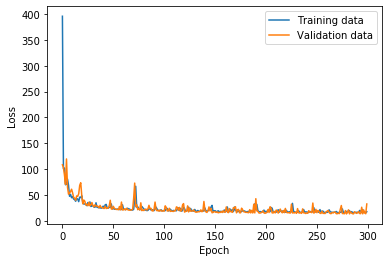

In [6]:
if __name__ == '__main__':
  main()